In [80]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(r"styles/deeplearning.mplstyle")
np.set_printoptions(precision=2)

### Problem Statement

In [81]:
x_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

y_train = np.array([460,
                    232,
                    178])

#### Matrix x containing examples

In [82]:
print(f"x shape: {x_train.shape}, x type: {type(x_train)}")
print(x_train)
print(f"\ny shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)

x shape: (3, 4), x type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]

y shape: (3,), y type: <class 'numpy.ndarray'>
[460 232 178]


#### Pramaeter vector w,b

In [83]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


### Model Prediction with multiple variables

#### Single Prediction element by element

In [84]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """

    n = x.shape[0]
    p = 0

    for i in range(n):
        p_i = x[i] * w[i]
        p += p_i
    
    p += b
    return p

In [85]:
# Get a row from training data
x_vec = x_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

# Make a predictions
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


#### Single Prediction, vector

In [86]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """

    p = np.dot(x, w) + b
    return p

In [87]:
# Get a row from training data
x_vec = x_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

# Make a predictions
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


### Compute Cost with Multiple Variables

In [88]:
def compute_cost(x, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = x.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost += (f_wb_i - y[i])**2
    
    cost = cost / (2 * m)
    return cost

In [89]:
# Compute and display cost using pre-chosen optimal parameters
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 1.5578904428966628e-12


### Gradient Descent with Multiple Variables

#### Compute Gradient with Multiple Variables

In [90]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        
        dj_db = dj_db + err
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [91]:
# Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_dw at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n {tmp_dj_dw}")

dj_dw at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


#### Gradient Descent with Multiple Variables

In [92]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    # An array to store cost j and w's at each iteration primarily for graphing later
    j_history = []
    w = copy.deepcopy(w_in) # Avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate Gradient and update parameters
        dj_db, dj_dw = gradient_function(x, y, w, b)

        # Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost j at each iteration
        if i < 100000: # Prevent resource exhaustion
            j_history.append(cost_function(x, y, w, b))
        
        # Print cost at intervals 10 times or as many iterations
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration: {i:4d}, Cost: {j_history[-1]:8.2f}")

    return w, b, j_history # Return final w,b and j history for graphing

In [96]:
# Initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# Gradient Descent settings
iterations = 200000
alpha = 5.0e-7

# Run gradient descent
w_final, b_final, j_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient,
                                            alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final}")

m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration:    0, Cost:  2529.46
Iteration: 20000, Cost:   594.33
Iteration: 40000, Cost:   574.73
Iteration: 60000, Cost:   569.18
Iteration: 80000, Cost:   566.01
Iteration: 100000, Cost:   563.25
Iteration: 120000, Cost:   563.25
Iteration: 140000, Cost:   563.25
Iteration: 160000, Cost:   563.25
Iteration: 180000, Cost:   563.25
b,w found by gradient descent: -0.03,[ 0.24  0.56 -1.62 -1.55]
prediction: 439.69, target value: 460
prediction: 278.44, target value: 232
prediction: 150.97, target value: 178


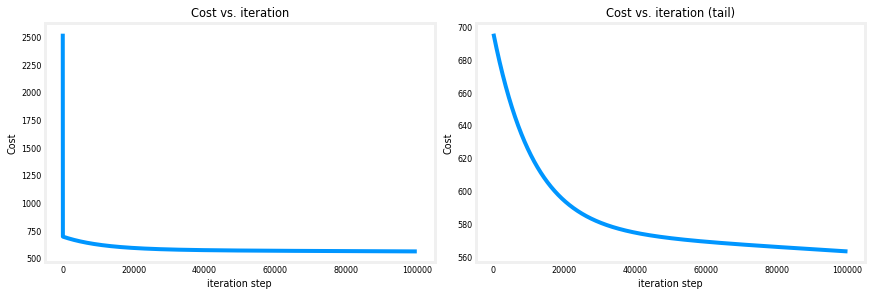

In [97]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_hist)
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()